<a href="https://colab.research.google.com/github/Pooja2061/Final-Assignment1AI/blob/main/2505809_PoojaBhandari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem 1
Basic Data Exploration & Trend Visualization

     Problem 1A: Single-Year HDI

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("/content/drive/MyDrive/AI/Final Assignment1/Human_Development_Index_Dataset.csv", encoding="latin1")

print("Available years:")
print(df["year"].unique())

hdi_2022_df = df[df["year"] == 2022].copy()

print("\nFirst 10 rows:")
display(hdi_2022_df.head(10))

print("\nShape:")
print(hdi_2022_df.shape)

print("\nData types:")
print(hdi_2022_df.dtypes)

print("\nMissing values:")
print(hdi_2022_df.isna().sum())

for col in hdi_2022_df.columns:
    if hdi_2022_df[col].dtype == object:
        hdi_2022_df[col] = hdi_2022_df[col].replace("–", np.nan)

numeric_cols = ["hdi", "gross_inc_percap", "life_expectancy", "gender_development"]

for col in numeric_cols:
    if col in hdi_2022_df.columns:
        hdi_2022_df[col] = pd.to_numeric(hdi_2022_df[col], errors="coerce")

hdi_2022_df = hdi_2022_df.drop_duplicates()
hdi_2022_df = hdi_2022_df.dropna(subset=["hdi"])

print("\nShape after cleaning:")
print(hdi_2022_df.shape)

print("\nHDI Statistics:")
print("Mean:", hdi_2022_df["hdi"].mean())
print("Median:", hdi_2022_df["hdi"].median())
print("Std:", hdi_2022_df["hdi"].std())

print("\nHighest HDI country:")
print(hdi_2022_df.loc[hdi_2022_df["hdi"].idxmax(), ["country", "hdi"]])

print("\nLowest HDI country:")
print(hdi_2022_df.loc[hdi_2022_df["hdi"].idxmin(), ["country", "hdi"]])

high_hdi_sorted = hdi_2022_df[hdi_2022_df["hdi"] > 0.800] \
    .sort_values(by="gross_inc_percap", ascending=False)

print("\nTop 10 HDI > 0.800 by GNI per capita:")
display(high_hdi_sorted.head(10))

def hdi_category(value):
    if value < 0.550:
        return "Low"
    elif value < 0.700:
        return "Medium"
    elif value < 0.800:
        return "High"
    else:
        return "Very High"

hdi_2022_df["HDI Category"] = hdi_2022_df["hdi"].apply(hdi_category)

print("\nHDI Category distribution:")
print(hdi_2022_df["HDI Category"].value_counts())

hdi_2022_df.to_csv("HDI_category_added.csv", index=False)

print("\nSaved: HDI_category_added.csv")
from google.colab import files
files.download("HDI_category_added.csv")





Available years:
[1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019 2020 2021 2022]

First 10 rows:


,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
32,33,AFG,Afghanistan,2022,0.462,62.879,41.128771,0.332443,0.534145,66.213,...,0.622,0.665,7.042050,24.077040,27.215190,72.784810,23.33,77.09,0.306318,1.1809
65,66,ALB,Albania,2022,0.789,76.833,2.842321,0.780277,0.798432,79.472,...,0.977,0.116,82.249185,86.476634,35.714286,64.285714,56.08,69.91,1.717758,11.7367
98,99,DZA,Algeria,2022,0.745,77.129,44.903225,0.681844,0.773800,78.457,...,0.881,0.460,42.910456,46.815170,7.005254,92.994746,17.57,65.53,4.079540,8.7199
131,132,AND,Andorra,2022,0.884,83.552,0.079824,NaN,NaN,85.838,...,NaN,NaN,81.718277,84.599998,46.428571,53.571429,NaN,NaN,4.593593,NaN
164,165,AGO,Angola,2022,0.591,61.929,35.588987,0.560890,0.619680,64.541,...,0.905,0.520,21.339865,37.411946,33.636364,66.363636,74.73,78.16,0.507359,3.6568
197,198,ATG,Antigua and Barbuda,2022,0.826,79.236,0.093763,NaN,NaN,81.645,...,NaN,NaN,NaN,NaN,31.428571,68.571429,NaN,NaN,6.401056,NaN
230,231,ARG,Argentina,2022,0.849,76.064,45.510318,0.841405,0.845473,79.277,...,0.995,0.292,73.591541,71.648085,44.376900,55.623100,52.08,71.74,4.190779,14.4512
263,264,ARM,Armenia,2022,0.786,73.372,2.780469,0.795110,0.774942,78.447,...,1.026,0.198,96.001381,97.050957,35.514019,64.485981,62.80,71.84,2.531088,7.3553
296,297,AUS,Australia,2022,0.946,83.579,26.177414,0.934602,0.955941,85.453,...,0.978,0.063,94.580063,94.430069,44.493392,55.506608,62.31,71.13,14.914763,26.9245
329,330,AUT,Austria,2022,0.926,82.412,8.939617,0.911592,0.937756,84.600,...,0.972,0.048,100.000000,100.000000,40.983607,59.016393,56.55,66.69,7.399461,27.9621



Shape:
(206, 30)

Data types:
Unnamed: 0                     int64
iso3                          object
country                       object
year                           int64
hdi                          float64
life_expectancy              float64
pop_millions                 float64
hdi_f                        float64
hdi_m                        float64
life_expec_f                 float64
life_expec_m                 float64
expec_yr_school              float64
expec_yr_school_f            float64
expec_yr_school_m            float64
mean_yr_school               float64
mean_yr_school_f             float64
mean_yr_school_m             float64
gross_inc_percap             float64
gross_inc_percap_f           float64
gross_inc_percap_m           float64
gender_development           float64
gender_inequality            float64
secondary_education_f_%      float64
secondary_education_m_%      float64
seats_in_parliament_f_%      float64
seats_in_parliament_m_%      float64
labour_

,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
3332,3333,LIE,Liechtenstein,2022,0.942,84.656,0.039327,0.924163,0.974295,86.129,...,0.949,NaN,NaN,NaN,28.000000,72.000000,52.79,67.26,3.736776,NaN
4718,4719,QAT,Qatar,2022,0.875,81.559,2.695122,0.892561,0.869100,83.101,...,1.027,0.212,81.832741,71.417976,4.444444,95.555556,61.73,95.33,39.884274,63.5912
5213,5214,SGP,Singapore,2022,0.949,84.133,5.975689,0.945325,0.954078,86.295,...,0.991,0.036,80.464020,85.932037,29.126214,70.873786,63.37,77.00,9.397481,43.1508
2705,2706,IRL,Ireland,2022,0.950,82.716,5.023109,0.942838,0.951392,84.412,...,0.991,0.072,88.585639,86.417415,27.397260,72.602740,59.40,70.51,7.529751,26.3467
3398,3399,LUX,Luxembourg,2022,0.927,82.591,0.647599,0.920482,0.927311,84.770,...,0.993,0.043,96.579350,89.328283,33.333333,66.666667,57.99,65.09,13.185395,49.1903
6104,6105,ARE,United Arab Emirates,2022,0.937,79.196,9.441128,0.922940,0.936027,81.412,...,0.986,0.035,82.029137,86.145172,50.000000,50.000000,55.32,89.45,25.333276,28.1632
5609,5610,CHE,Switzerland,2022,0.967,84.255,8.740472,0.949369,0.977383,85.932,...,0.971,0.018,96.939726,97.517437,39.024390,60.975610,61.49,71.94,4.117550,33.5913
4322,4323,NOR,Norway,2022,0.966,83.393,5.434319,0.957148,0.970415,85.055,...,0.986,0.012,99.094031,99.274980,44.970414,55.029586,62.53,69.59,7.573541,32.0515
6170,6171,USA,United States,2022,0.927,78.203,338.289857,0.927693,0.923405,81.015,...,1.005,0.180,95.424278,95.067093,28.060264,71.939736,56.79,67.97,14.932487,29.3498
2474,2475,HKG,"Hong Kong, China (SAR)",2022,0.956,84.315,7.488865,0.942671,0.969515,86.893,...,0.972,NaN,77.866913,84.067802,NaN,NaN,52.91,64.71,4.373242,NaN



HDI Category distribution:
HDI Category
Very High    71
High         54
Medium       44
Low          35
Name: count, dtype: int64

Saved: HDI_category_added.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

     Problem 1B: HDI Trend Analysis

Saved: HDI_problem1B.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

region mapping for bar chart
Line Chart – HDI Trend


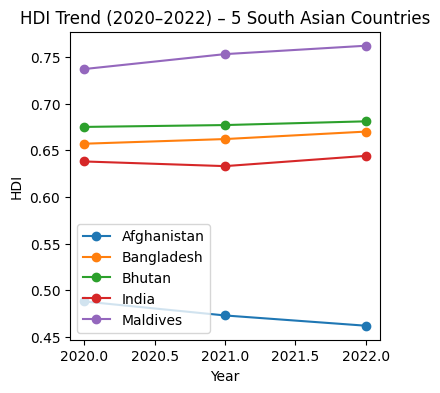

Interpretation: Shows HDI trends for South Asian countries, highlighting improvements or declines.
Bar Chart – Average HDI by Region


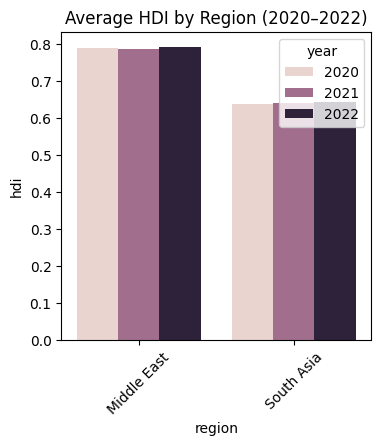

Interpretation: South Asia generally shows lower HDI than Middle East. Trends across years are visible.
Box Plot – HDI Distribution


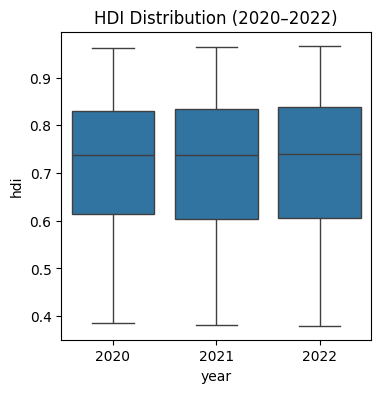

Interpretation: Box plot shows spread and median HDI each year. Outliers indicate countries with very high or low HDI.
Scatter Plot – HDI vs GNI per Capita


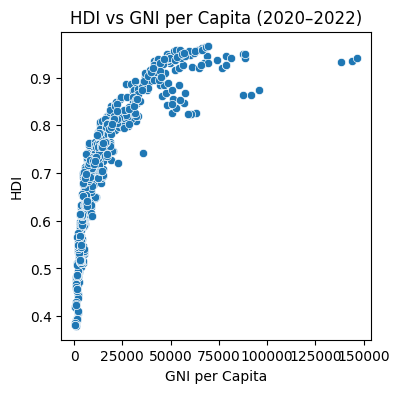

Interpretation: Positive relationship between income and HDI. Higher GNI usually correlates with higher HDI.
Short Analysis Questions
1.Greatest improvement and decline

Top 5 countries with greatest HDI improvement (2020→2022):
country
Andorra       0.041
Azerbaijan    0.038
Ecuador       0.031
Maldives      0.025
Mexico        0.024
Name: change_2020_2022, dtype: float64
2.Did any countries experience a decline in HDI? Provide possible reasons.

Top 5 countries with HDI decline (2020→2022):
country
Timor-Leste   -0.067
Ukraine       -0.028
Afghanistan   -0.026
Namibia       -0.024
Lebanon       -0.019
Name: change_2020_2022, dtype: float64
3.Regional average highest and lowest HDI across these three years.

Average HDI by region (2020–2022):
region
Middle East    0.788909
South Asia     0.639583
Name: hdi, dtype: float64

Region with highest average HDI: Middle East
Region with lowest average HDI: South Asia
4.Global events interpretation

COVID-19 and other global events may have im

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/drive/MyDrive/AI/Final Assignment1/Human_Development_Index_Dataset.csv", encoding="latin1")
hdi_1B_df = df[df["year"].isin([2020, 2021, 2022])].copy()

for col in ["hdi", "life_expectancy", "gross_inc_percap", "gender_development"]:
    hdi_1B_df[col] = pd.to_numeric(hdi_1B_df[col], errors="coerce")

hdi_1B_df = hdi_1B_df.drop_duplicates()
hdi_1B_df = hdi_1B_df.dropna(subset=["hdi", "country", "year"])

hdi_1B_df.to_csv("HDI_problem1B.csv", index=False)
print("Saved: HDI_problem1B.csv")
from google.colab import files
files.download("HDI_problem1B.csv")


print("region mapping for bar chart")
region_dict = {
    "Afghanistan": "South Asia", "Bangladesh": "South Asia", "Bhutan": "South Asia",
    "India": "South Asia", "Maldives": "South Asia", "Nepal": "South Asia",
    "Pakistan": "South Asia", "Sri Lanka": "South Asia",
    "Bahrain": "Middle East", "Iran": "Middle East", "Iraq": "Middle East",
    "Israel": "Middle East", "Jordan": "Middle East", "Kuwait": "Middle East",
    "Lebanon": "Middle East", "Oman": "Middle East", "Palestine": "Middle East",
    "Qatar": "Middle East", "Saudi Arabia": "Middle East", "Syria": "Middle East",
    "United Arab Emirates": "Middle East", "Yemen": "Middle East"
}
hdi_1B_df["region"] = hdi_1B_df["country"].map(region_dict)

print("Line Chart – HDI Trend")
south_asia_countries = hdi_1B_df[hdi_1B_df["region"] == "South Asia"]["country"].unique()[:5]
plt.figure(figsize=(4,4))
for country in south_asia_countries:
    country_data = hdi_1B_df[hdi_1B_df["country"] == country]
    plt.plot(country_data["year"], country_data["hdi"], marker='o', label=country)
plt.title("HDI Trend (2020–2022) – 5 South Asian Countries")
plt.xlabel("Year")
plt.ylabel("HDI")
plt.legend()
plt.show()
print("Interpretation: Shows HDI trends for South Asian countries, highlighting improvements or declines.")

print("Bar Chart – Average HDI by Region")
region_avg = hdi_1B_df.groupby(["region", "year"])["hdi"].mean().reset_index()
plt.figure(figsize=(4,4))
sns.barplot(data=region_avg, x="region", y="hdi", hue="year")
plt.title("Average HDI by Region (2020–2022)")
plt.xticks(rotation=45)
plt.show()
print("Interpretation: South Asia generally shows lower HDI than Middle East. Trends across years are visible.")

print("Box Plot – HDI Distribution")
plt.figure(figsize=(4,4))
sns.boxplot(data=hdi_1B_df, x="year", y="hdi")
plt.title("HDI Distribution (2020–2022)")
plt.show()
print("Interpretation: Box plot shows spread and median HDI each year. Outliers indicate countries with very high or low HDI.")

print("Scatter Plot – HDI vs GNI per Capita")
if "gross_inc_percap" in hdi_1B_df.columns:
    plt.figure(figsize=(4,4))
    sns.scatterplot(data=hdi_1B_df, x="gross_inc_percap", y="hdi")
    plt.title("HDI vs GNI per Capita (2020–2022)")
    plt.xlabel("GNI per Capita")
    plt.ylabel("HDI")
    plt.show()
    print("Interpretation: Positive relationship between income and HDI. Higher GNI usually correlates with higher HDI.")
else:
    print("GNI per Capita variable not available in the dataset.")

print("Short Analysis Questions")
print("1.Greatest improvement and decline")
hdi_change = hdi_1B_df.pivot(index="country", columns="year", values="hdi").dropna()
hdi_change["change_2020_2022"] = hdi_change[2022] - hdi_change[2020]

print("\nTop 5 countries with greatest HDI improvement (2020→2022):")
print(hdi_change["change_2020_2022"].sort_values(ascending=False).head(5))

print("2.Did any countries experience a decline in HDI? Provide possible reasons.")
print("\nTop 5 countries with HDI decline (2020→2022):")
print(hdi_change["change_2020_2022"].sort_values().head(5))

print("3.Regional average highest and lowest HDI across these three years.")
region_avg_overall = hdi_1B_df.groupby("region")["hdi"].mean()
print("\nAverage HDI by region (2020–2022):")
print(region_avg_overall)
print("\nRegion with highest average HDI:", region_avg_overall.idxmax())
print("Region with lowest average HDI:", region_avg_overall.idxmin())

print("4.Global events interpretation")
print("\nCOVID-19 and other global events may have impacted HDI trends by affecting health, education, and income metrics across countries during 2020–2022. Observed trends in HDI improvements or declines may reflect these global impacts.")


     Problem 2: Advanced HDI Exploration

SOUTH ASIA SUBSET
HDI_SouthAsia.csv saved


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

COMPOSITE DEVELOPMENT SCORE


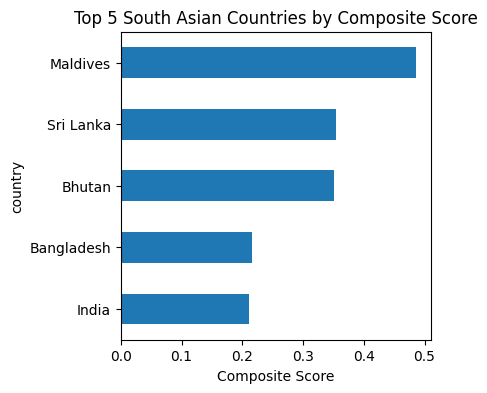

             Composite Score       HDI
country                               
Maldives            0.486229  0.682500
Sri Lanka           0.354546  0.715606
Bhutan              0.351001  0.634538
Bangladesh          0.215311  0.531303
India               0.211298  0.541485
Pakistan            0.198051  0.472545
Nepal               0.184773  0.504242
Afghanistan         0.113948  0.401030
OUTLIER DETECTION


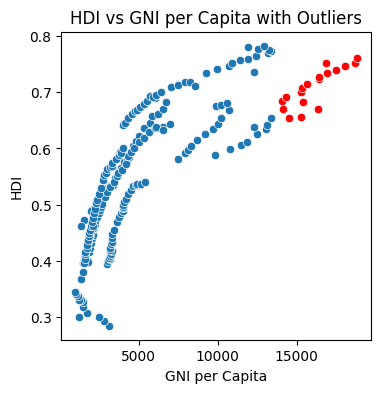

       country    hdi  gross_inc_percap
3511  Maldives  0.655       14543.14634
3512  Maldives  0.656       15287.20714
3514  Maldives  0.670       16391.40757
3515  Maldives  0.670       14162.42816
3516  Maldives  0.682       15423.81910
3517  Maldives  0.684       14050.92438
3518  Maldives  0.692       14363.23615
3519  Maldives  0.701       15300.31364
3520  Maldives  0.708       15355.44089
3521  Maldives  0.715       15648.36655
3522  Maldives  0.723       16410.16419
3523  Maldives  0.728       16414.93039
3524  Maldives  0.734       16911.45422
3525  Maldives  0.740       17474.64201
3526  Maldives  0.747       18055.72465
3527  Maldives  0.753       18679.92536
3529  Maldives  0.753       16857.60546
3530  Maldives  0.762       18846.79219
METRIC RELATIONSHIPS
Correlation HDI vs gender_development: 0.87


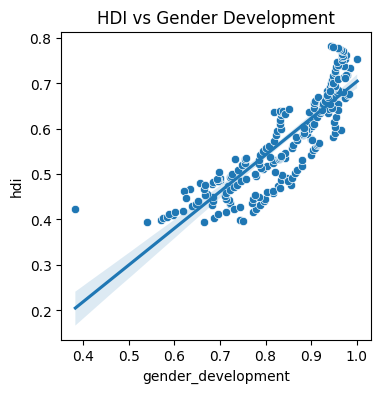

Correlation HDI vs life_expectancy: 0.96


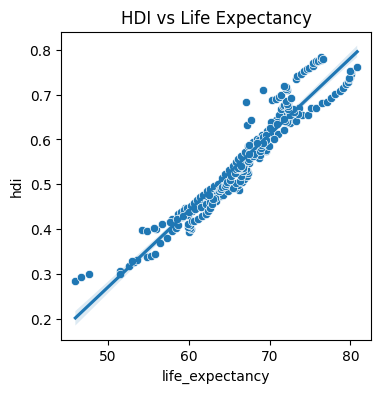

GNI–HDI GAP ANALYSIS


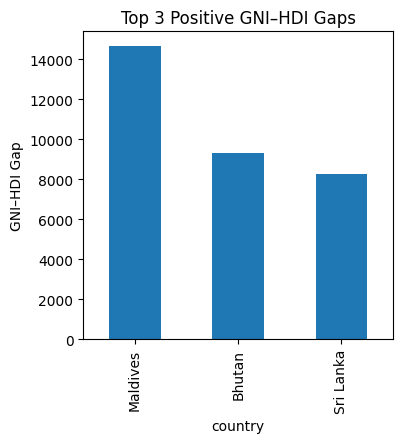

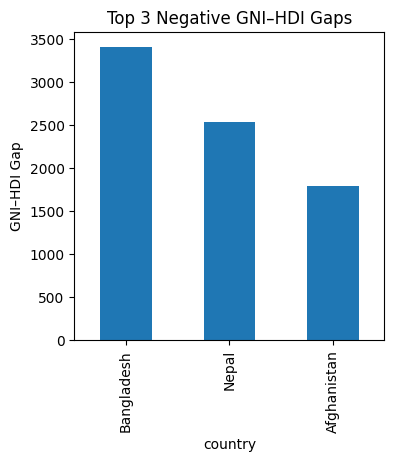

country
Maldives       14670.635594
Bhutan          9320.175767
Sri Lanka       8268.373527
Pakistan        3883.813530
India           3771.381346
Bangladesh      3408.490410
Nepal           2532.443971
Afghanistan     1793.487770
Name: gni_hdi_gap, dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/drive/MyDrive/AI/Final Assignment1/Human_Development_Index_Dataset.csv",encoding="latin1")

print("SOUTH ASIA SUBSET")
south_asia = [
    "Afghanistan", "Bangladesh", "Bhutan", "India",
    "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]

sa_df = df[df["country"].isin(south_asia)].copy()

for col in ["hdi", "life_expectancy", "gross_inc_percap", "gender_development"]:
    sa_df[col] = pd.to_numeric(sa_df[col], errors="coerce")

sa_df = sa_df.drop_duplicates()
sa_df = sa_df.dropna(subset=["hdi", "life_expectancy", "gross_inc_percap"])

sa_df.to_csv("HDI_SouthAsia.csv", index=False)
print("HDI_SouthAsia.csv saved")
from google.colab import files
files.download("HDI_SouthAsia.csv")

print("COMPOSITE DEVELOPMENT SCORE")
le_min, le_max = sa_df["life_expectancy"].min(), sa_df["life_expectancy"].max()
gni_min, gni_max = sa_df["gross_inc_percap"].min(), sa_df["gross_inc_percap"].max()

sa_df["life_expectancy_index"] = (sa_df["life_expectancy"] - le_min) / (le_max - le_min)
sa_df["gni_index"] = (sa_df["gross_inc_percap"] - gni_min) / (gni_max - gni_min)

sa_df["composite_score"] = (
    0.30 * sa_df["life_expectancy_index"]
    + 0.30 * sa_df["gni_index"]
)

composite_rank = sa_df.groupby("country")["composite_score"].mean().sort_values(ascending=False)
hdi_rank = sa_df.groupby("country")["hdi"].mean().sort_values(ascending=False)

plt.figure(figsize=(4,4))
composite_rank.head(5).plot(kind="barh")
plt.gca().invert_yaxis()
plt.title("Top 5 South Asian Countries by Composite Score")
plt.xlabel("Composite Score")
plt.show()

print(pd.concat([composite_rank, hdi_rank], axis=1, keys=["Composite Score", "HDI"]))

print("OUTLIER DETECTION")
def find_outliers(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return data[(data[column] < lower) | (data[column] > upper)]

outliers_df = pd.concat([
    find_outliers(sa_df, "hdi"),
    find_outliers(sa_df, "gross_inc_percap")
]).drop_duplicates()

plt.figure(figsize=(4,4))
sns.scatterplot(data=sa_df, x="gross_inc_percap", y="hdi")
sns.scatterplot(data=outliers_df, x="gross_inc_percap", y="hdi", color="red")
plt.title("HDI vs GNI per Capita with Outliers")
plt.xlabel("GNI per Capita")
plt.ylabel("HDI")
plt.show()

print(outliers_df[["country", "hdi", "gross_inc_percap"]])

print("METRIC RELATIONSHIPS")
for metric in ["gender_development", "life_expectancy"]:
    corr = sa_df[metric].corr(sa_df["hdi"])
    print(f"Correlation HDI vs {metric}: {corr:.2f}")

    plt.figure(figsize=(4,4))
    sns.scatterplot(data=sa_df, x=metric, y="hdi")
    sns.regplot(data=sa_df, x=metric, y="hdi", scatter=False)
    plt.title(f"HDI vs {metric.replace('_',' ').title()}")
    plt.show()

print("GNI–HDI GAP ANALYSIS")
sa_df["gni_hdi_gap"] = sa_df["gross_inc_percap"] - sa_df["hdi"]
gap_rank = sa_df.groupby("country")["gni_hdi_gap"].mean().sort_values(ascending=False)

plt.figure(figsize=(4,4))
gap_rank.head(3).plot(kind="bar")
plt.title("Top 3 Positive GNI–HDI Gaps")
plt.ylabel("GNI–HDI Gap")
plt.show()

plt.figure(figsize=(4,4))
gap_rank.tail(3).plot(kind="bar")
plt.title("Top 3 Negative GNI–HDI Gaps")
plt.ylabel("GNI–HDI Gap")
plt.show()

print(gap_rank)


    Problem 3: Comparative Regional Analysis

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saved South Asia and Middle East subsets.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Descriptive Statistics

South Asia HDI mean/std: 0.6395833333333333 0.09827331747496995
Middle East HDI mean/std: 0.7889090909090909 0.14129476362297624
Region with higher average HDI: Middle East
Top and Bottom Performers


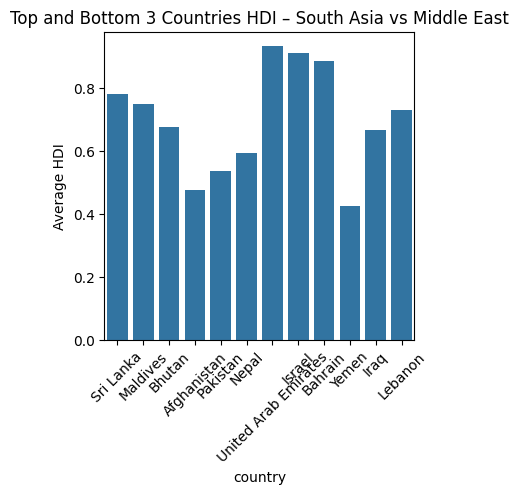

Metric Comparisons


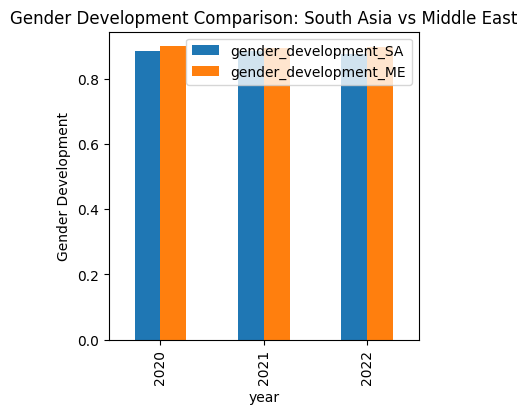

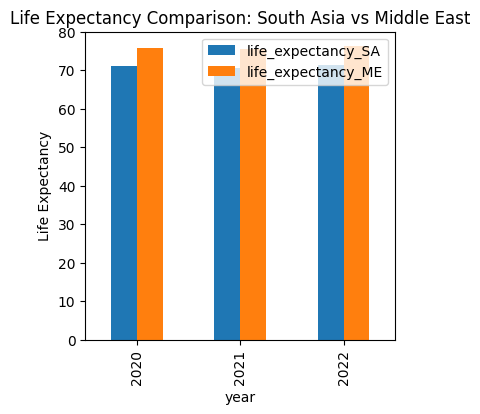

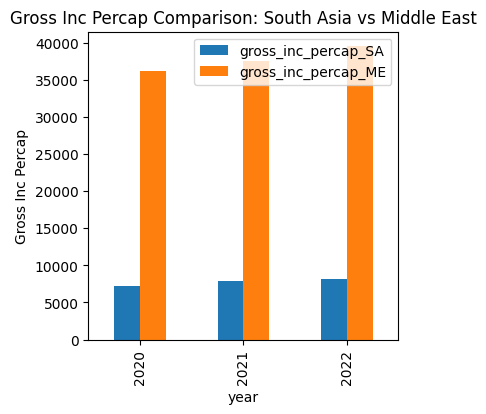


Metric with greatest regional disparity: gross_inc_percap
Mean differences: {'gender_development': np.float64(0.01508712121212119), 'life_expectancy': np.float64(4.885371212121214), 'gross_inc_percap': np.float64(29984.260588178036)}
HDI Disparity

HDI range SA/ME: 0.321 0.5130000000000001
HDI CV SA/ME: 0.1536520924690084 0.17910145193048382
Region with more variation in HDI: Middle East
Correlation Analysis

South Asia correlations: HDI vs Gender Development: 0.87, HDI vs Life Expectancy: 0.94


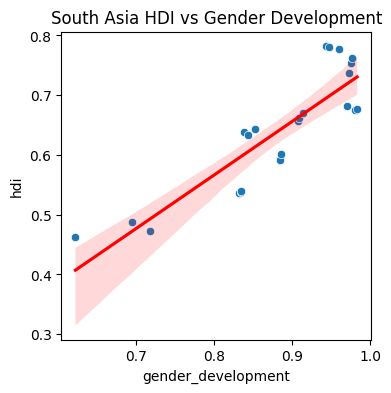

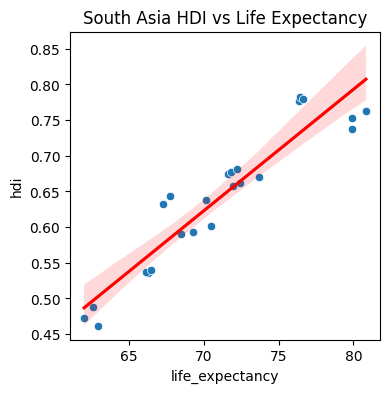


Middle East correlations: HDI vs Gender Development: 0.94, HDI vs Life Expectancy: 0.93


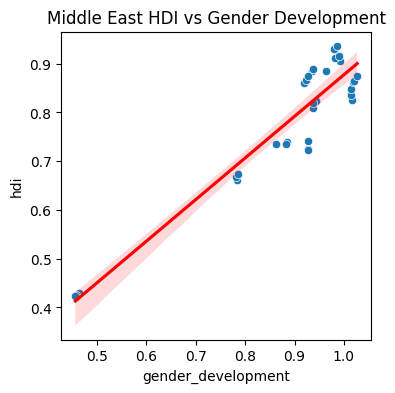

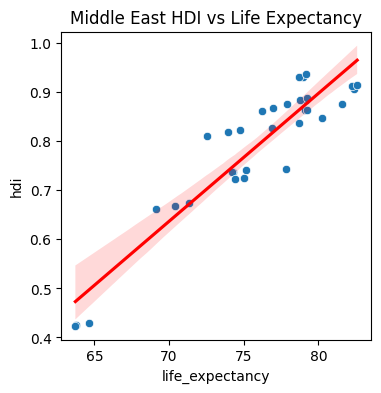

Outlier Detection


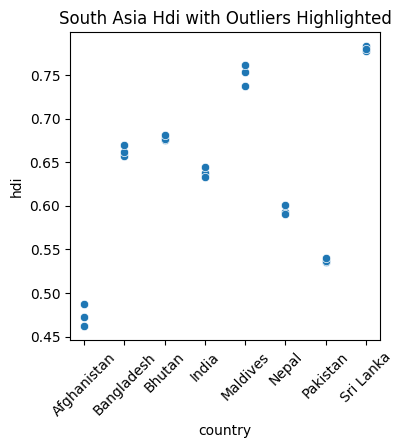

South Asia hdi outliers:
 Empty DataFrame
Columns: [country, hdi]
Index: []


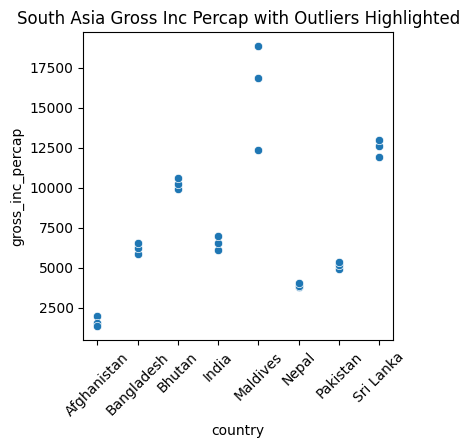

South Asia gross inc percap outliers:
 Empty DataFrame
Columns: [country, gross_inc_percap]
Index: []


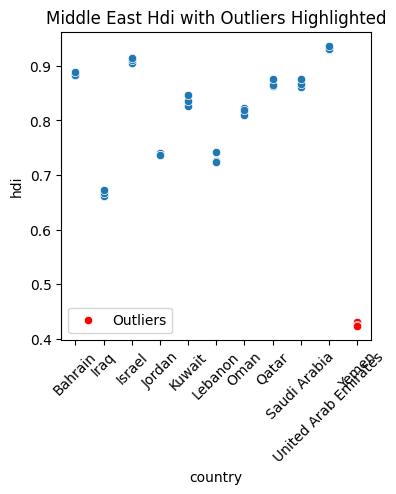

Middle East hdi outliers:
     country    hdi
568   Yemen  0.430
569   Yemen  0.425
570   Yemen  0.424


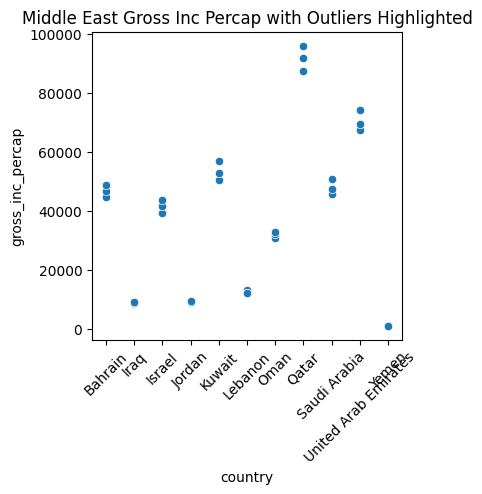

Middle East gross inc percap outliers:
 Empty DataFrame
Columns: [country, gross_inc_percap]
Index: []


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/drive/MyDrive/AI/Final Assignment1/HDI_problem1B.csv")

south_asia = ["Afghanistan","Bangladesh","Bhutan","India","Maldives","Nepal","Pakistan","Sri Lanka"]
middle_east = ["Bahrain","Iran","Iraq","Israel","Jordan","Kuwait","Lebanon","Oman",
               "Palestine","Qatar","Saudi Arabia","Syria","United Arab Emirates","Yemen"]

sa_df = df[df["country"].isin(south_asia)].copy()
me_df = df[df["country"].isin(middle_east)].copy()

from google.colab import files
sa_df.to_csv("HDI_SouthAsia_2020_2022.csv", index=False)
files.download("HDI_SouthAsia_2020_2022.csv") #first download

me_df.to_csv("HDI_MiddleEast_2020_2022.csv", index=False)
print("Saved South Asia and Middle East subsets.")
files.download("HDI_MiddleEast_2020_2022.csv") #second download


print("Descriptive Statistics")
sa_mean, sa_std = sa_df["hdi"].mean(), sa_df["hdi"].std()
me_mean, me_std = me_df["hdi"].mean(), me_df["hdi"].std()
print("\nSouth Asia HDI mean/std:", sa_mean, sa_std)
print("Middle East HDI mean/std:", me_mean, me_std)
print("Region with higher average HDI:", "South Asia" if sa_mean>me_mean else "Middle East")


print("Top and Bottom Performers")
sa_top3 = sa_df.groupby("country")["hdi"].mean().sort_values(ascending=False).head(3)
sa_bottom3 = sa_df.groupby("country")["hdi"].mean().sort_values().head(3)
me_top3 = me_df.groupby("country")["hdi"].mean().sort_values(ascending=False).head(3)
me_bottom3 = me_df.groupby("country")["hdi"].mean().sort_values().head(3)
top_bottom_df = pd.concat([sa_top3, sa_bottom3, me_top3, me_bottom3]).reset_index()
plt.figure(figsize=(4,4))
sns.barplot(x="country", y="hdi", data=top_bottom_df)
plt.title("Top and Bottom 3 Countries HDI – South Asia vs Middle East")
plt.ylabel("Average HDI")
plt.xticks(rotation=45)
plt.show()


print("Metric Comparisons")
metrics = ["gender_development","life_expectancy","gross_inc_percap"]
for metric in metrics:
    sa_metric = sa_df.groupby("year")[metric].mean().reset_index()
    me_metric = me_df.groupby("year")[metric].mean().reset_index()
    merged = sa_metric.merge(me_metric, on="year", suffixes=("_SA","_ME"))
    merged.plot(x="year", y=[metric+"_SA", metric+"_ME"], kind="bar", figsize=(4,4))
    plt.title(f"{metric.replace('_',' ').title()} Comparison: South Asia vs Middle East")
    plt.ylabel(metric.replace('_',' ').title())
    plt.show()
metric_diff = {}

for metric in metrics:
    diff = abs(sa_df[metric].mean() - me_df[metric].mean())
    metric_diff[metric] = diff

print("\nMetric with greatest regional disparity:", max(metric_diff, key=metric_diff.get))
print("Mean differences:", metric_diff)

print("HDI Disparity")
sa_range, me_range = sa_df["hdi"].max()-sa_df["hdi"].min(), me_df["hdi"].max()-me_df["hdi"].min()
sa_cv, me_cv = sa_df["hdi"].std()/sa_df["hdi"].mean(), me_df["hdi"].std()/me_df["hdi"].mean()
print("\nHDI range SA/ME:", sa_range, me_range)
print("HDI CV SA/ME:", sa_cv, me_cv)
print("Region with more variation in HDI:", "South Asia" if sa_cv>me_cv else "Middle East")


print("Correlation Analysis")
for region_name, region_df in [("South Asia", sa_df), ("Middle East", me_df)]:
    corr_hdi_gdi = region_df["hdi"].corr(region_df["gender_development"])
    corr_hdi_life = region_df["hdi"].corr(region_df["life_expectancy"])
    print(f"\n{region_name} correlations: HDI vs Gender Development: {corr_hdi_gdi:.2f}, HDI vs Life Expectancy: {corr_hdi_life:.2f}")
    plt.figure(figsize=(4,4))
    sns.scatterplot(x=region_df["gender_development"], y=region_df["hdi"])
    sns.regplot(x=region_df["gender_development"], y=region_df["hdi"], scatter=False, color='red')
    plt.title(f"{region_name} HDI vs Gender Development")
    plt.show()
    plt.figure(figsize=(4,4))
    sns.scatterplot(x=region_df["life_expectancy"], y=region_df["hdi"])
    sns.regplot(x=region_df["life_expectancy"], y=region_df["hdi"], scatter=False, color='red')
    plt.title(f"{region_name} HDI vs Life Expectancy")
    plt.show()


print("Outlier Detection")
def detect_outliers(df, col):
    Q1,Q3 = df[col].quantile(0.25), df[col].quantile(0.75)
    IQR = Q3-Q1
    lower, upper = Q1-1.5*IQR, Q3+1.5*IQR
    return df[(df[col]<lower)|(df[col]>upper)]

for region_name, region_df in [("South Asia", sa_df), ("Middle East", me_df)]:
    for col in ["hdi","gross_inc_percap"]:
        outliers = detect_outliers(region_df,col)
        plt.figure(figsize=(4,4))
        sns.scatterplot(data=region_df, x="country", y=col)
        if not outliers.empty:
            sns.scatterplot(data=outliers, x="country", y=col, color='red', label='Outliers')
        plt.title(f"{region_name} {col.replace('_',' ').title()} with Outliers Highlighted")
        plt.xticks(rotation=45)
        plt.show()
        print(f"{region_name} {col.replace('_',' ')} outliers:\n", outliers[["country",col]])
